<a href="https://colab.research.google.com/github/racode23/Tomto_deep_learning_project/blob/main/Tomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
!pip install tensorflow-gpu==2.0.0-beta0
!pip install tensorflow_hub
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from tensorflow import keras
keras.utils.custom_object_scope
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta0


In [39]:
pd.set_option("display.precision", 8)

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
data_root='/content/drive/MyDrive/DATASET/train'


In [42]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="validation",
    shuffle=True,
    target_size=IMAGE_SHAPE
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="training",
    shuffle=True,
    target_size=IMAGE_SHAPE
    )

/content/drive/MyDrive/DATASET/train
Found 2007 images belonging to 10 classes.
Found 8036 images belonging to 10 classes.


In [43]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(),
 key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 10)
['Tomato___Bacterial_Spot' 'Tomato___Early_Blight' 'Tomato___Late_Blight'
 'Tomato___Leaf_Mold' 'Tomato___Septoria_Leaf_Spot'
 'Tomato___Spider_Mites Two-Spotted_Spider_Mite' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tomato_Mosaic_Virus'
 'Tomato___Healthy']


In [44]:
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    output_shape=[1280],
    trainable=False),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')])


In [45]:
model.build([None, 224, 224, 3])
model.summary()
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                12810     
                                                                 
Total params: 2270794 (8.66 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [46]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)


In [ ]:
!pip install --upgrade tensorflow

In [47]:
hist = model.fit(
                 train_generator,
                 epochs=20,
                  verbose=1,
                 steps_per_epoch=steps_per_epoch,
                 validation_data=valid_generator,
                 validation_steps=val_steps_per_epoch).history

Epoch 1/20
252/252 [==============================] - 50s 157ms/step - loss: 1.1912 - acc: 0.5944 - val_loss: 0.6161 - val_acc: 0.8231
Epoch 2/20
252/252 [==============================] - 32s 126ms/step - loss: 0.6351 - acc: 0.7855 - val_loss: 0.4861 - val_acc: 0.8550
Epoch 3/20
252/252 [==============================] - 32s 128ms/step - loss: 0.5165 - acc: 0.8278 - val_loss: 0.4256 - val_acc: 0.8685
Epoch 4/20
252/252 [==============================] - 34s 135ms/step - loss: 0.4636 - acc: 0.8433 - val_loss: 0.3930 - val_acc: 0.8764
Epoch 5/20
252/252 [==============================] - 33s 130ms/step - loss: 0.4243 - acc: 0.8573 - val_loss: 0.3642 - val_acc: 0.8874
Epoch 6/20
252/252 [==============================] - 36s 143ms/step - loss: 0.4110 - acc: 0.8620 - val_loss: 0.3487 - val_acc: 0.8839
Epoch 7/20
252/252 [==============================] - 36s 144ms/step - loss: 0.3863 - acc: 0.8715 - val_loss: 0.3742 - val_acc: 0.8690
Epoch 8/20
252/252 [==============================] - 3

In [64]:
tf.saved_model.save(model,"/content/drive/MyDrive/DATASET/MobilenetV2")

KeyboardInterrupt: ignored

In [89]:
imported_model = tf.saved_model.load("/content/drive/MyDrive/DATASET/MobilenetV2")

In [68]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [91]:
tf_model_predictions = model.predict(val_image_batch)
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head()

1/1 [==============================] - 0s 33ms/step
Prediction results for the first elements


,Tomato___Bacterial_Spot,Tomato___Early_Blight,Tomato___Late_Blight,Tomato___Leaf_Mold,Tomato___Septoria_Leaf_Spot,Tomato___Spider_Mites Two-Spotted_Spider_Mite,Tomato___Target_Spot,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Mosaic_Virus,Tomato___Healthy
0,7.32065610e-06,0.00044849,0.00446010,0.98783082,0.00005137,0.00247950,0.00006177,0.00223643,0.00242101,0.00000321
1,4.40549920e-05,0.00018377,0.00000591,0.00012184,0.00025775,0.00540597,0.00052230,0.00545647,0.98788536,0.00011655
2,2.20922902e-01,0.00193042,0.00374332,0.00085196,0.01000592,0.00909098,0.75035501,0.00009779,0.00000214,0.00299957
3,1.54424889e-03,0.00611189,0.00186991,0.01523889,0.00146391,0.71462780,0.25840518,0.00068186,0.00001350,0.00004285
4,4.22542591e-11,0.00000005,0.00000007,0.00000023,0.00000001,0.00094048,0.00004871,0.00000011,0.00000003,0.99901032


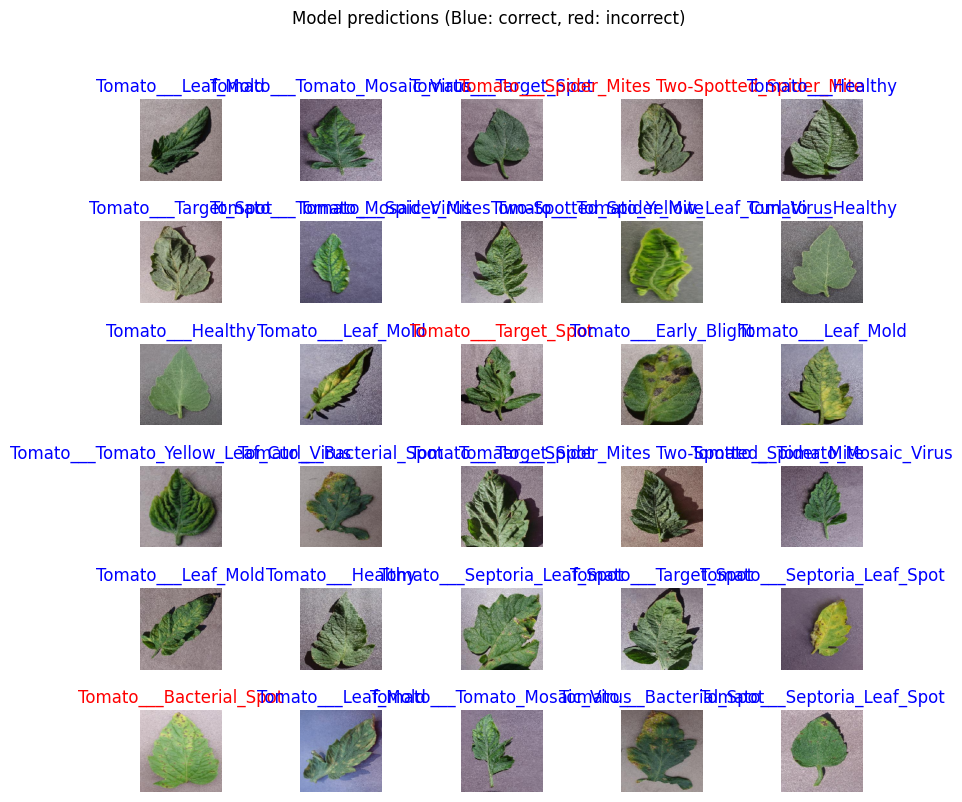

In [92]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "blue" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (Blue: correct, red: incorrect)")

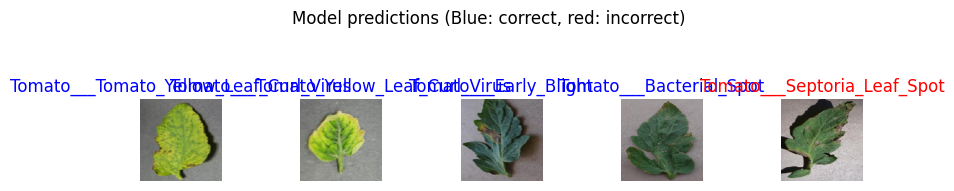

In [53]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(5):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "blue" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (Blue: correct, red: incorrect)")

Text(0.5, 1.0, 'Tomato___Tomato_Mosaic_Virus')

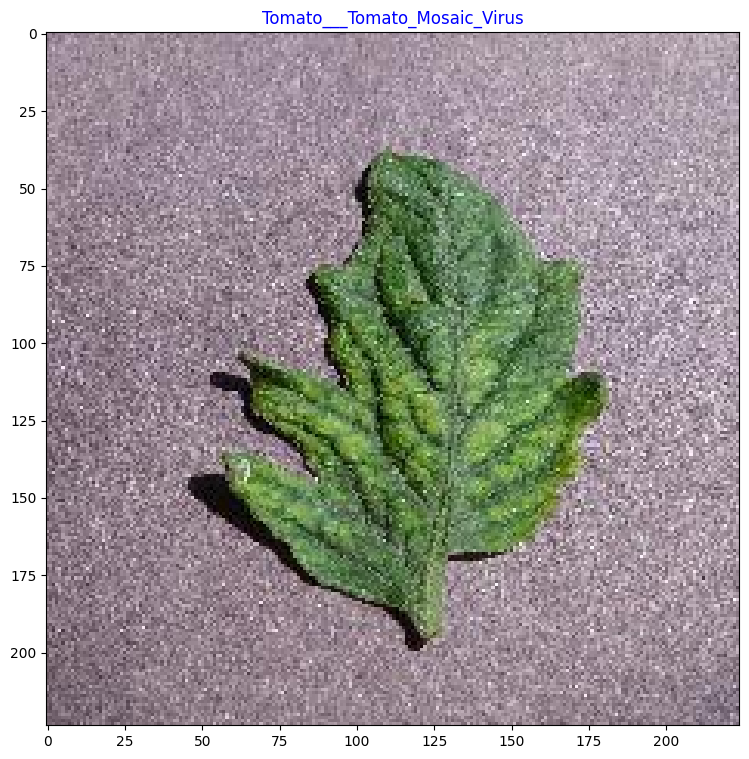

In [71]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
n=11
plt.imshow(val_image_batch[n])
color = "blue" if predicted_ids[n] == true_label_ids[n] else "red"
plt.title(predicted_labels[n].title(), color=color)

In [95]:
model2 = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')])


In [101]:
model2.build([None, 224, 224, 3])
model2.summary()
model2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 26, 26, 128)      

In [81]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)


In [104]:
hist2 = model2.fit(
                 train_generator,
                 epochs=20,
                  verbose=1,
                 steps_per_epoch=steps_per_epoch,
                 validation_data=valid_generator,
                 validation_steps=val_steps_per_epoch).history

Epoch 1/20
  6/252 [..............................] - ETA: 17s - loss: 4.7513 - acc: 0.0938

KeyboardInterrupt: ignored

In [83]:
tf.saved_model.save(model2, "/content/drive/MyDrive/DATASET/con2")

In [84]:
imported_model = tf.saved_model.load("/content/drive/MyDrive/DATASET/con2")

In [85]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [93]:
tf_model_predictions = model2.predict(val_image_batch)
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head()

1/1 [==============================] - 0s 27ms/step
Prediction results for the first elements


,Tomato___Bacterial_Spot,Tomato___Early_Blight,Tomato___Late_Blight,Tomato___Leaf_Mold,Tomato___Septoria_Leaf_Spot,Tomato___Spider_Mites Two-Spotted_Spider_Mite,Tomato___Target_Spot,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Mosaic_Virus,Tomato___Healthy
0,2.27039114e-15,4.92470281e-06,3.61239252e-08,2.27030646e-02,4.93735582e-01,1.81310369e-10,1.20855418e-11,3.95366878e-10,4.83556449e-01,6.43297065e-16
1,8.61731256e-15,1.89640196e-11,3.69620723e-11,9.92043078e-06,1.96016387e-07,6.55878353e-07,1.78013715e-06,1.61542641e-13,9.99987483e-01,2.08012820e-13
2,2.33649320e-12,4.81010565e-10,4.41464088e-10,5.37028200e-09,1.82036027e-12,9.37770092e-05,9.99906182e-01,2.44507566e-13,3.31614758e-09,6.51756860e-16
3,1.87273330e-09,6.92776030e-06,3.30975212e-07,4.93985510e-08,7.39035357e-08,9.96871531e-01,3.12081375e-03,7.97398050e-11,1.44917189e-09,2.34595646e-07
4,1.30177950e-26,1.29342939e-14,4.94386303e-12,4.46474251e-18,5.41808554e-18,1.13200445e-08,9.98495340e-01,4.71230807e-26,4.87079554e-14,1.50463404e-03


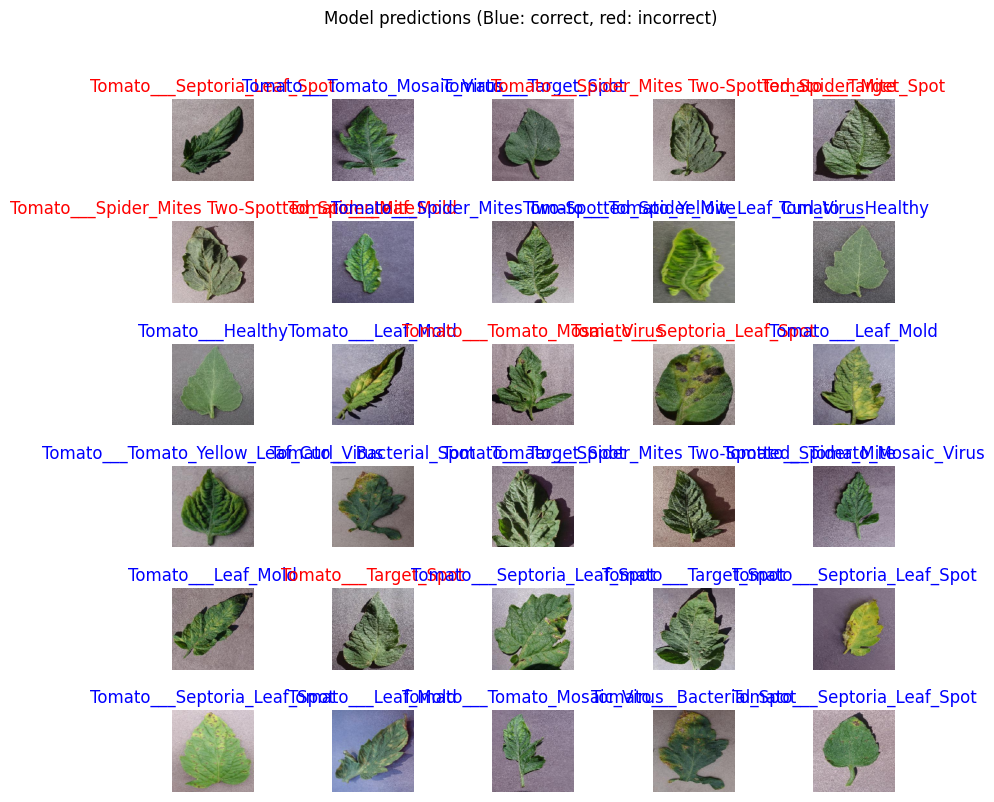

In [94]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "blue" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (Blue: correct, red: incorrect)")

In [128]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [129]:
model3 = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')])


In [130]:
model3.build([None, 224, 224, 3])
model3.summary()
model3.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.02),
    loss='categorical_crossentropy',
    metrics=['acc'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 25088)             0         
                                                                 
 dense_16 (Dense)            (None, 128)               3211392   
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 17927370 (68.39 MB)
Trainable params: 17927370 (68.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [131]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)


In [132]:
hist3 = model3.fit(
                 train_generator,
                 epochs=20,
                  verbose=1,
                 steps_per_epoch=steps_per_epoch,
                 validation_data=valid_generator,
                 validation_steps=val_steps_per_epoch).history

Epoch 1/20
252/252 [==============================] - 110s 404ms/step - loss: 205857713777803264.0000 - acc: 0.1030 - val_loss: 2.3046 - val_acc: 0.0997
Epoch 2/20
252/252 [==============================] - 100s 398ms/step - loss: 2.3056 - acc: 0.0952 - val_loss: 2.3047 - val_acc: 0.0997
Epoch 3/20
252/252 [==============================] - 100s 398ms/step - loss: 2.3052 - acc: 0.1035 - val_loss: 2.3048 - val_acc: 0.0997
Epoch 4/20
252/252 [==============================] - 101s 398ms/step - loss: 2.3051 - acc: 0.1008 - val_loss: 2.3046 - val_acc: 0.1031
Epoch 5/20
252/252 [==============================] - 100s 397ms/step - loss: 2.3060 - acc: 0.0951 - val_loss: 2.3043 - val_acc: 0.1031
Epoch 6/20
252/252 [==============================] - 100s 397ms/step - loss: 2.3060 - acc: 0.0957 - val_loss: 2.3036 - val_acc: 0.0997
Epoch 7/20
252/252 [==============================] - 103s 409ms/step - loss: 2.3055 - acc: 0.0999 - val_loss: 2.3039 - val_acc: 0.0997
Epoch 8/20
252/252 [===========

In [133]:
tf.saved_model.save(model2, "/content/drive/MyDrive/DATASET/vgg16_3")

In [134]:
imported_model = tf.saved_model.load("/content/drive/MyDrive/DATASET/vgg16_3")

In [135]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [136]:
tf_model_predictions = model3.predict(val_image_batch)
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head()

1/1 [==============================] - 0s 147ms/step
Prediction results for the first elements


,Tomato___Bacterial_Spot,Tomato___Early_Blight,Tomato___Late_Blight,Tomato___Leaf_Mold,Tomato___Septoria_Leaf_Spot,Tomato___Spider_Mites Two-Spotted_Spider_Mite,Tomato___Target_Spot,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Mosaic_Virus,Tomato___Healthy
0,0.09531076,0.11401702,0.09376787,0.10095694,0.10476743,0.10841294,0.09166194,0.09616937,0.10002021,0.09491556
1,0.09531076,0.11401702,0.09376787,0.10095694,0.10476743,0.10841294,0.09166194,0.09616937,0.10002021,0.09491556
2,0.09531076,0.11401702,0.09376787,0.10095694,0.10476743,0.10841294,0.09166194,0.09616937,0.10002021,0.09491556
3,0.09531076,0.11401702,0.09376787,0.10095694,0.10476743,0.10841294,0.09166194,0.09616937,0.10002021,0.09491556
4,0.09531076,0.11401702,0.09376787,0.10095694,0.10476743,0.10841294,0.09166194,0.09616937,0.10002021,0.09491556


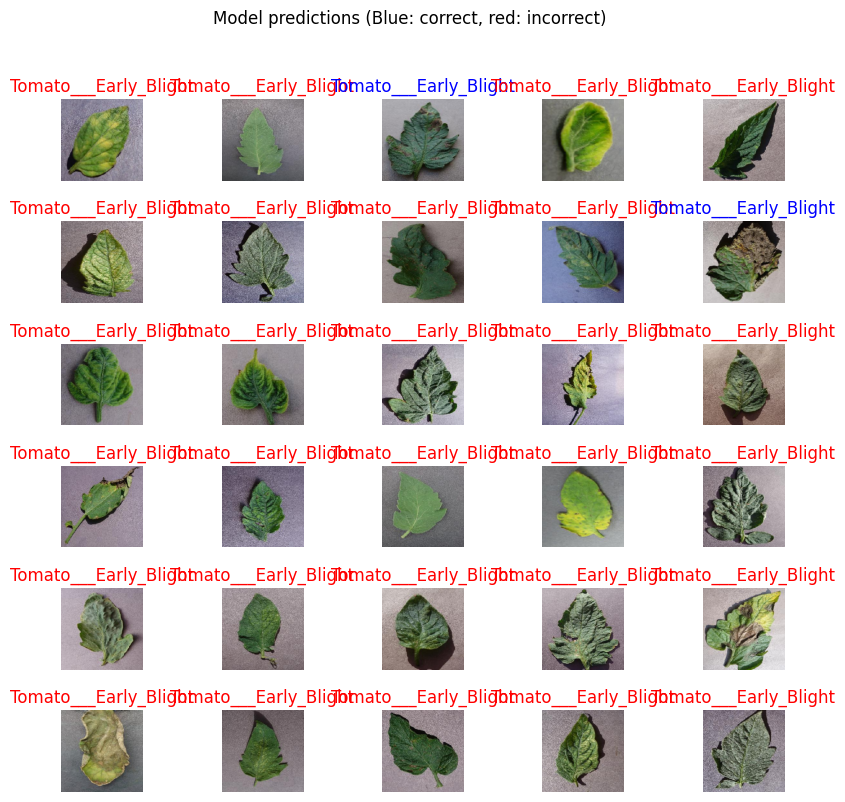

In [137]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "blue" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (Blue: correct, red: incorrect)")